In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
N=500
P=2
M=3
weight=[ 0.2 ,0.4, 0.4]
mean=  [-2.5 , 0 ,  3 ]
covs=  [  1  ,0.7,  1 ]#标准差
Theta=np.array([weight,mean,covs])
betat=np.array([0.3 , 0.5])

In [3]:
#定义各组样本量的界点
subnum=np.zeros(M-1)
subnum[0]=N*weight[0]
weight1=np.zeros(M+1)
weight1[0]=0
weight1[M]=1
for i in range(1,M-1):
    subnum[i]=subnum[i-1]+N*weight[i]
for i in range(1,M):
    weight1[i]=np.sum(weight[:i])

In [4]:
weight1

array([0. , 0.2, 0.6, 1. ])

# 问题一：x是否需要随机生成？

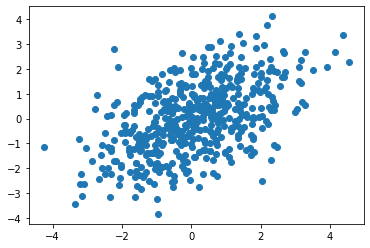

In [5]:
np.random.seed(123)
mu=np.array([0,0])
cov=np.array([[2,1],[1,2]])
X=np.random.multivariate_normal(mu,cov,N,check_valid='raise')
plt.plot(X[:,0],X[:,1],'o')

In [6]:
np.savetxt('X.csv',X,delimiter=',')

# 根据y=xβ+γ，随机生成Y

def creatY():
    Y=np.zeros((N,2))
    for i in range(N):
        a=np.random.rand()
        for j in range(M):
            if a>=weight1[j] and a<=weight1[j+1]:
                Y[i,0]=np.dot(X[i],betat)+np.random.normal(Theta[1,j],Theta[2,j])
                Y[i,1]=j
    return Y

In [7]:
def creatY():
    Y=np.zeros(N)
    tgroup=np.zeros(N)
    for i in range(N):
        a=np.random.rand()
        for j in range(M):
            if a>=weight1[j] and a<=weight1[j+1]:
                Y[i]=np.dot(X[i],betat)+np.random.normal(Theta[1,j],Theta[2,j])
                tgroup[i]=int(j)
    return Y,tgroup

In [8]:
samples=np.zeros((N,1000))
sgroup=np.zeros((N,1000))
for i in range(1000):
    sam=creatY()
    samples[:,i]=sam[0]
    sgroup[:,i]=sam[1]

In [10]:
np.savetxt('Y1000.csv',samples,delimiter=',')
np.savetxt('sgroup.csv',sgroup,delimiter=',')